# High-level programming: Python
## Why

1. Rapid development
2. Powerfull
3. Can be combined with other languages such as C to achieve high performance  
4. Large community, widely used programming language
5. Many powerful modules available - from machine learning to web servers

## Data types

In [1]:
None, False, True
i = 1
f = 1.0
s = "Hallo"

In [2]:
l = [1, 's']

t = (1, 3, 1, "t")
# same as
t = 1, 3, 1, "t"

d = {1: "Paris",
     2: "London",
     3: "Oslo",
    }

s = set([1, 3, 1.0, "t"])

## Conditions

In [3]:
1 < 2 <= 3

True

In [4]:
"a" < "b"

True

In [5]:
True and False

False

In [6]:
(True or False) and True

True

## Functions

A simple function

In [7]:
def square(x):
    return x**2

Optional arguments:

In [8]:
def greet(a, b, c="Hallo", d="go"):
    print "{} {} {}, {}!".format(c, a, b, d)

In [9]:
a = greet("Simon", "Funke", "Welcome")

Welcome Simon Funke, go!


In [10]:
print a

None


Function with arbitrary inputs:

In [11]:
def many_inputs(*args, **kwargs):
    print "args = ", args
    print "kwargs = ", kwargs

In [12]:
many_inputs(1, 10.0, "s", info="Information")

args =  (1, 10.0, 's')
kwargs =  {'info': 'Information'}


Function that returns multiple values:

In [13]:
def many_outputs():
    a = 10
    b = "c"
    # do something
    return a, b, a

In [14]:
r, s, t = many_outputs()

This `unpacking` works also for nested tuples:

In [15]:
a, (b, c) = 1, (2, 3)

## Classes

In [16]:
class BaseSolver(object):
    name = "BaseSolver"

    def __init__(self, params):
        self.params = params
        
    def solve(self):
        print "{} is solving with parameters {}".format(self.name, self.params)
        
    @classmethod
    def print_name(cls):
        print cls.name

In [17]:
base = BaseSolver({"x": 1})

In [18]:
base.print_name()

BaseSolver


In [19]:
base.params

{'x': 1}

In [20]:
base.solve()

BaseSolver is solving with parameters {'x': 1}


In [21]:
class SpecialSolver(BaseSolver):
    name = "SpecialSolver"

    @property
    def solution(self):
        print "Getting solution"
        
    def __call__(self):
        self.solve()

In [22]:
special = SpecialSolver({"x": 2})

In [23]:
special.print_name()

SpecialSolver


In [24]:
special.solve()

SpecialSolver is solving with parameters {'x': 2}


In [25]:
special.solution

Getting solution


Check class inheritance with:

In [26]:
isinstance(special, BaseSolver)

True

Show inheritance list (Method Resolution Order):

In [27]:
SpecialSolver.__mro__

(__main__.SpecialSolver, __main__.BaseSolver, object)

## Python Decorators

*Basic idea*: Decorators allow you to inject or modify code in functions or classes.

A timing decorator

In [28]:
import time 

def time_dec(func):

  def wrapper(*arg):
      start = time.time()
      res = func(*arg)
      end = time.time()
      print func.func_name, end - start
      return res

  return wrapper

@time_dec
def slow_func(sec):
    return time.sleep(sec)
    
slow_func(1.5)

slow_func 1.50158596039


Other case ideas:
* Count number function calls (coverage test).
* Memoize function.
* Pre/post conditions to functions (type check, input range check).
* Add deprecation warnings to functions.
* Redirect STDOUT/STDIN temporarly during a function execution.
* py.test uses decorators to mark certain tests as slow or quick.
* py.test uses parametrized decorators to parametrize tests.

## Exceptions

In [29]:
1/0

ZeroDivisionError: integer division or modulo by zero

In [ ]:
try:
    1/0
except ZeroDivisionError, e:
    print "Warning: divided by zero, but Ill be ignoring it"
    print "Error message was: ", e

In [ ]:
raise ValueError, "My error message"

## Numpy

In [3]:
import numpy

a1 = numpy.zeros((5, 5))
print a1

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [4]:
a1 += 1.5
print a1

[[ 1.5  1.5  1.5  1.5  1.5]
 [ 1.5  1.5  1.5  1.5  1.5]
 [ 1.5  1.5  1.5  1.5  1.5]
 [ 1.5  1.5  1.5  1.5  1.5]
 [ 1.5  1.5  1.5  1.5  1.5]]


In [5]:
numpy.arange(25)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [6]:
a2 = numpy.arange(25).reshape(a1.shape)
print a2

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [7]:
a3 = numpy.sin(a1 + a2)
print a3

[[ 0.99749499  0.59847214 -0.35078323 -0.97753012 -0.70554033]
 [ 0.21511999  0.93799998  0.79848711 -0.07515112 -0.87969576]
 [-0.87545217 -0.0663219   0.80378443  0.93489506  0.20646748]
 [-0.71178534 -0.97562601 -0.34248062  0.60553987  0.99682979]
 [ 0.471639   -0.48717451 -0.99808203 -0.59135753  0.35905835]]


In [8]:
a3[1:5, 1::2]

array([[ 0.93799998, -0.07515112],
       [-0.0663219 ,  0.93489506],
       [-0.97562601,  0.60553987],
       [-0.48717451, -0.59135753]])

In [9]:
numpy.asarray([1, 2, 3])

array([1, 2, 3])

In [10]:
numpy.asarray(["hallo", 2, 1.0])

array(['hallo', '2', '1.0'], 
      dtype='|S5')

In [11]:
numpy.asarray(["1", 2, None], dtype=object)

array(['1', 2, None], dtype=object)

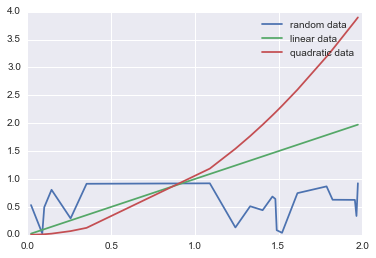

In [42]:
import matplotlib
%matplotlib inline
import seaborn as sns

# random x data from 0 to 2
x = numpy.random.rand(20)*2
x.sort()

# random y data
y = numpy.random.rand(len(x))

matplotlib.pyplot.plot(x, y, label="random data")
matplotlib.pyplot.plot(x, x, label="linear data")
matplotlib.pyplot.plot(x, x**2, label="quadratic data")

matplotlib.pyplot.legend()

## 'Pythonic' programming

Python's philosophy:
* readabile
* minimalistic
* "there's one way to do it" 

Pythonic means "follows the Python idioms": The Python language actively encourages a large number of idioms to accomplish a number of tasks ("the one way to do it").


Some more good programming rules:
* Minimise indentation   
* Minimise code repetition
* Minimise variable name lengths while keeping semantics intact

### Pythonic Looping over lists
Consider this C code for traversing a list:

```C
for (i=0; i < mylist_length; i++) {
   do_something(mylist[i]);
}
```


The equivalent Python translation would be:
```python
i = 0
while i < len(mylist):
   do_something(mylist[i])
   i += 1
```

This code is not very Pythonic. A Python idiom is to generate all indexes with `range`:
```python
for i in range(len(mylist_length)):
   do_something(mylist[i])
```

An even more Pythonic way is to use Python's functionality to loop over lists:
```python
for item in mylist:
   do_something(item)
```

### Pythonic Looping over lists with indices

What if your function requires both the item and the index in the list? Use:
    
```python
for i, item in enumerate(mylist):
   do_something(i, item)
```

### Swapping two (or more) variables
Task: Swap varialbes `a` and `b`

In [43]:
a, b = 5, 6

Non-Pythonic version

In [ ]:
a_tmp = a
a = b
b = a_tmp

Pythonic version

In [ ]:
a, b = b, a

### Create a comma sparated list

Non-Pythonic

In [ ]:
cities = ["London", "Oslo", "Paris"]
l = ""
for c in cities:
    l += c + ", "
l = l[:-2]
print l

Pythonic:

In [ ]:
cities = ["London", "Oslo", "Paris"]
print ', '.join(cities)

### Repeated variable name in condition

Non-Pythonic

In [ ]:
city = "Magdeburg"

if city == 'Lodon' or city == 'Oslo' or city == 'Paris':
    is_captital = True

Pythonic

In [ ]:
if city in ('Lodon', 'Oslo', 'Paris'):
    is_captital = True

### Create a list of greetings from names 

Non-Pythonic

In [57]:
names = ["Petter", "Hans", "Georg"]
greeting = "Dear"

In [58]:
greetings = []
for name in names:
    greetings.append("{} {}".format(greeting, name))
print greetings

['Dear Petter', 'Dear Hans', 'Dear Georg']


Pythonic

In [59]:
greetings = ["{} {}".format(greeting, name) for name in names]
print greetings

['Dear Petter', 'Dear Hans', 'Dear Georg']


### Filter elements larger than 4

Non-Pythonic

In [60]:
# Filter elements greater than 4
a = [3, 4, 5]
b = []
for i in a:
    if i > 4:
        b.append(i)

Pythonic

In [61]:
b = [i for i in a if i > 4]

### What next

* Look at the [Flask project](https://github.com/mitsuhiko/flask/blob/master/flask/app.py) source code for an example for a Pythonic project. [Here](http://flask.pocoo.org/docs/0.10/api/#flask.Flask) is the Sphinx generated documentation from that source code.
* Use sphinx to automatically generate a documentation for your project 
* Use [readthedocs](readthedocs.org) to automatically publish documentation online
* Learn `map`, `reduce` and `lambda` functions

Most importantly:
* Use Python to make your daily work easier!